# TITLE : MODELS OF VISCOSITY FROM COMPOSITIONAL DATA MWC7+  TEMP PRESSURE USING MACHINE LEARNING ALGORITHM

OBJECTIVE : TRINING OF MODELS FOR FUTURE SELECTION FOR PREDICTION OF VISCOSITY USING WIDE RANGE OF COMPOSITION DATA.

THIS FILE AUTOMATICALLY FIT MODELS AND STORE MODELS AT GIVEN PATH 

IF REVIEWER WANT TO CHECK SIMILLAR MODELS USED TO PREDICT TEST OR NOT WHICH TRAINED HERE THAN IN MODEL VALIDATION FILE OPTIMIZED PARAMETER CAN BE CKECKED WHICH AVOID RETRAINING WHICH TAKE A LOT TIME AS WELL AS TO CHECK DATA TRAIN AND TEST ALREADY SEPRATED AND STAROED INTO DATASOURCE FROM PREPROCESSING FILE SAME DATA USED HERE WHICH VERIFIED BY CHEKING EXCEL FILES 


ALGORITHM APPLIED : LINEAR REGRESSION, SUPPORT VECTOR MACHINE, KNN, RANDOM FOREST, DECISION TREE, XGB , ANN

In [1]:
#DATA EXTRACTION, MANIPULATION, VIZULIZATION LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#STATISTICAL TOOLS LIBRARY
import scipy.stats as stat
import pylab 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#DATA FETURES OPERATION LIBRARY
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

#MODELING LIBRARY
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

#MODELLING OF DEEP LEARNING MODEL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch


#MODEL EVALUATION LIBRARY
from sklearn.metrics import mean_squared_error , mean_absolute_error


#Model saving
import pickle


<ipython-input-1-1ef187d9cf9b>:33: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [2]:
path = "C:\\STUDY DRIVE\\VISCOSITY PAPER THESIS\\BELOW BUBBLE POINT\\VISCOSITY COMPOSITION\\MODEL 1\\DATASOURCE\\"
file_name = "TRAIN.csv"
model_path = "C:\\STUDY DRIVE\\VISCOSITY PAPER THESIS\\BELOW BUBBLE POINT\\VISCOSITY COMPOSITION\\MODEL 1\\MODELS\\"

export_data_path = "C:\\STUDY DRIVE\\VISCOSITY PAPER THESIS\\BELOW BUBBLE POINT\\VISCOSITY COMPOSITION\\MODEL 1\\EXPORTED DATA\\"

figure_path = "C:\\STUDY DRIVE\\VISCOSITY PAPER THESIS\\BELOW BUBBLE POINT\\VISCOSITY COMPOSITION\\MODEL 1\\FIGURES\\"

train = pd.read_csv(path+file_name)

In [3]:
train.head()

,H2S,N2,CO2,C1,C2,C3,C4,C5,C6,C7+,MWC7+,Temp,P,VISCOSITY
0,0.0,0.0044,0.0083,0.2775,0.075400,0.069000,0.046100,0.031000,0.0311,0.4572,272.000000,364.816667,106.462585,1.560000
1,0.0,0.0103,0.0138,0.3617,0.075732,0.078068,0.053237,0.039863,0.0338,0.3335,195.711574,427.600000,123.658862,0.911174
2,0.0,0.0033,0.0019,0.3542,0.033600,0.009000,0.009500,0.004000,0.0072,0.5773,255.000000,344.000000,92.753588,2.962963
3,0.0,0.0033,0.0019,0.3542,0.033600,0.009000,0.009500,0.004000,0.0072,0.5773,255.000000,344.250000,104.400000,2.650000
4,0.0,0.0054,0.0050,0.2779,0.068900,0.063400,0.044500,0.032900,0.0350,0.4670,214.000000,364.816667,112.585034,1.860000


In [4]:
X_train = train.drop("VISCOSITY",axis = 1)
y_train = train.VISCOSITY

                              #### Scalling Dataset ####

In [5]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)

In [6]:
#following model path follows for all models location
scaler_file = 'scaler.sav'
pickle.dump(scaler , open(model_path+scaler_file , "wb") )

##### .......................................................................................SectionBreak.......................................................................................

## 1. Linear Regression Model

                              #### Calculate VIF for features ####

In [7]:
VIF = [variance_inflation_factor(x_train , i) for i in range(0,x_train.shape[1])]  #shape is indicating number of columns which is argument for VIF

In [8]:
VIF_DataFrame = pd.DataFrame(VIF)
VIF_DataFrame = VIF_DataFrame.rename({0:"VIF"} , axis = 1)
VIF_DataFrame["FEATURES"] = X_train.columns
VIF_DataFrame = VIF_DataFrame[["FEATURES" , "VIF"]]
VIF_DataFrame

,FEATURES,VIF
0,H2S,5.417068
1,N2,9.401669
2,CO2,328.200536
3,C1,4309.523974
4,C2,395.684460
5,C3,829.874318
6,C4,355.192434
7,C5,89.743169
8,C6,83.480735
9,C7+,7879.757830


In [9]:
VIF_DataFrame.to_excel(export_data_path+"VIF.xlsx")

                              #### Model Fitting for linear regression ####

In [10]:
linear_regression = LinearRegression()
linear_regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

                         #### Model Summary #### 

In [11]:
x_train_linear_summary = sm.add_constant(x_train, prepend=False)
y_train_linear_summary = y_train

In [12]:
linear_summary = sm.OLS(y_train_linear_summary ,  x_train_linear_summary).fit()

In [13]:
linear_summary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              VISCOSITY   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     17.74
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           4.33e-26
Time:                        13:28:00   Log-Likelihood:                -132.57
No. Observations:                 197   AIC:                             293.1
Df Residuals:                     183   BIC:                             339.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0466      0.082     -0.572      0.568      -0.208       0.114
x2            -0.0177      0.107     -0.165      0.869      -0.230       0.194
x3            -0.5325      0.635     -0.838      0.403      -1.786       0.721
x4            -1.9242      2.301     -0.836      0.404      -6.465       2.617
x5             0.2044      0.697      0.293      0.770      -1.171       1.580
x6            -1.6162      1.010     -1.600      0.111      -3.609       0.376
x7            -0.3083      0.661     -0.467      0.641      -1.612       0.995
x8            -0.5915      0.332     -1.781      0.077      -1.247       0.064
x9            -0.1254      0.320     -0.392      0.696      -0.757       0.507
x10           -2.1584      3.112     -0.694      0.489      -8.298       3.982
x11           -0.0507      0.057     -0.896      0.371      -0.163       0.061
x12           -0.3167      0.048     -6.622      0.000      -0.411      -0.222
x13           -0.1746      0.047     -3.697      0.000      -0.268      -0.081
const          0.9059      0.035     25.839      0.000       0.837       0.975
==============================================================================
Omnibus:                       70.671   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.792
Skew:                           1.503   Prob(JB):                     2.78e-46
Kurtosis:                       7.065   Cond. No.                         248.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                                    #### Model Saving ####

In [14]:
linear_file = 'linear_model.sav'
pickle.dump(linear_regression , open(model_path+linear_file , "wb") )

## 2. SVR MODEL

                              #### Model tuning for svr Regression ####

In [15]:
svr_model = SVR()

In [16]:
svr_para = {'C':np.arange(50,5000,50),'gamma':np.arange(0.01,0.5,0.01)}
svr_grid = GridSearchCV(svr_model,svr_para, cv = 5 , verbose=3, n_jobs=-1)

In [17]:
svr_grid.fit(x_train,y_train)

Fitting 5 folds for each of 4851 candidates, totalling 24255 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 5648 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 11958 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 13712 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 15824 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 18320 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 21200 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 24240 out of 24255 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 24255 out of 24255 | elapsed:  1.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([  50,  100,  150,  200,  250,  300,  350,  400,  450,  500,  550,
        600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050, 1100,
       1150, 1200, 1250, 1300, 1350, 1400, 1...
       4450, 4500, 4550, 4600, 4650, 4700, 4750, 4800, 4850, 4900, 4950]),
                         'gamma': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49])},
       

In [18]:
svr_grid.best_params_

{'C': 50, 'gamma': 0.05}

In [19]:
svr_best_para = svr_grid.best_params_

In [20]:
svr_regression = SVR( C = svr_best_para["C"],
                      gamma = svr_best_para["gamma"])
svr_regression.fit(x_train,y_train)

SVR(C=50, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.05,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

                                          #### Model saveing #### 

In [21]:
svr_file = 'svr_model.sav'
pickle.dump(svr_regression , open(model_path+svr_file , "wb") )

## 3. Decision Tree Model 

                                          #### Model tuning #### 

In [22]:
dt_model = DecisionTreeRegressor()

In [23]:
dt_para = {
    'criterion': ['mse', 'mae'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,7,1),
    'min_samples_split': range(2,7,1),
    'splitter' : ['best', 'random']
    }

In [24]:
dt_grid = GridSearchCV(estimator=dt_model,
                     param_grid=dt_para,
                     cv=5,
                     n_jobs =-1,
                     verbose=3)
dt_grid.fit(x_train,y_train)

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 17551 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 18000 out of 18000 | elapsed:    9.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 7),
                  

In [25]:
dt_grid.best_params_

{'criterion': 'mse',
 'max_depth': 31,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'splitter': 'random'}

In [26]:
dt_best_para = dt_grid.best_params_

In [27]:
dt_regression = DecisionTreeRegressor(criterion = dt_best_para["criterion"],
                                      max_depth = dt_best_para["max_depth"],
                                      min_samples_leaf = dt_best_para["min_samples_leaf"],
                                      min_samples_split = dt_best_para["min_samples_split"],
                                      splitter = dt_best_para["splitter"],
                                      random_state = 0
                                      )

dt_regression.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=31,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='random')

                                          #### Model saveing #### 

In [28]:
#model_path = 'C:\\STUDY DRIVE\\Mtech New\\DENSITY PREDICTION\\MODELS\\SATURATION PRESSURE PREDICTION SATURATION DATASET 2 PART 4 MODELS\\'
dt_file = 'dt_model.sav'
pickle.dump(dt_regression , open(model_path+dt_file , "wb") )

## 4. Random forest Model 

                                          #### Model parameter tuning #### 

In [29]:
rf_model = RandomForestRegressor()

In [30]:
rf_para = {
    "n_estimators" : range(90,150,5),
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,5,1),
    'min_samples_split': range(2,5,1),
    'max_features' : ['auto','log2']
}

rf_grid = GridSearchCV(estimator=rf_model,
                           param_grid=rf_para,
                           cv=5,
                           n_jobs =-1,
                           verbose = 3)

In [31]:
rf_grid.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 5184 candidates, totalling 25920 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done 2256 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3088 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 4048 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 5136 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 6352 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 7696 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 9168 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 10768 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 12496 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 14352 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 16336 tasks      | elapsed: 

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [32]:
rf_grid.best_params_

{'max_depth': 15,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 110}

In [33]:
rf_best_para = rf_grid.best_params_

                                          #### Model fiting with tuning #### 

In [34]:
rf_regression = RandomForestRegressor(n_estimators = rf_best_para["n_estimators"],
                                      max_depth = rf_best_para["max_depth"],
                                      min_samples_leaf =rf_best_para["min_samples_leaf"],
                                      min_samples_split = rf_best_para["min_samples_split"],
                                      max_features = rf_best_para["max_features"],
                                      random_state = 0
                                      )

rf_regression.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=110, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

                                          #### Model Saving #### 

In [35]:
rf_file = 'rf_model.sav'
pickle.dump(rf_regression , open(model_path+rf_file , "wb") )

## 5. KNN Model

In [36]:
knn_model = KNeighborsRegressor()

In [37]:
knn_para = {"n_neighbors"  : range(2,11)}
knn_grid = GridSearchCV(knn_model,knn_para, verbose=3, n_jobs=-1)

In [38]:
knn_grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': range(2, 11)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=3)

In [39]:
knn_grid.best_params_

{'n_neighbors': 3}

In [40]:
knn_best_para = knn_grid.best_params_

In [41]:
knn_regression = KNeighborsRegressor( n_neighbors = knn_best_para["n_neighbors"])

knn_regression.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

                                          #### Model Saving #### 

In [42]:
knn_file = 'knn_model.sav'
pickle.dump(knn_regression , open(model_path+knn_file , "wb") )

## 6. XGB Model

In [43]:
xgb_model = XGBRegressor()

In [44]:
xgb_para={
   
    'learning_rate': np.arange(0.1,0.2,0.04),
    'max_depth': range(2,10,1),
    'n_estimators':range(90,150,10),
    "gamma" : np.arange(0.1,0.5,0.3),
    "min_child_weight": range(1,10,2)
}

In [45]:
xgb_grid = GridSearchCV(xgb_model,xgb_para, cv = 5 , verbose=3, n_jobs=-1)

In [46]:
xgb_grid.fit(x_train,y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 6256 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | e

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid={

In [47]:
xgb_grid.best_params_

{'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 9,
 'min_child_weight': 7,
 'n_estimators': 90}

In [48]:
xgb_best_para = xgb_grid.best_params_

In [49]:
xgb_regression = XGBRegressor(
                    learning_rate = xgb_best_para["learning_rate"],
                    max_depth = xgb_best_para["max_depth"],
                    n_estimators = xgb_best_para["n_estimators"],
                    gamma = xgb_best_para["gamma"],
                    min_child_weight = xgb_best_para["min_child_weight"]
                    )
xgb_regression.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=9,
             min_child_weight=7, missing=nan, monotone_constraints='()',
             n_estimators=90, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [50]:
xgb_file = 'xgb_model.sav'
pickle.dump(xgb_regression , open(model_path+xgb_file , "wb") )

## 7. ANN Model

In [51]:
def build_model(hp):
    model = keras.Sequential()
    model.add(tf.keras.Input(shape=x_train.shape[1]))
    
    for i in range(hp.Int('layers', 2, 15)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=3,
                                            max_value=15,
                                            step=1),
                               activation=hp.Choice('act_' + str(i),["relu","tanh"])))
        
    model.add(layers.Dense(1, activation='linear'))
    
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_squared_error',
        metrics=['mean_squared_error'])
    return model

In [52]:
tuner = RandomSearch(
    build_model,
    objective='val_mean_squared_error',
    max_trials=50,
    executions_per_trial=3,
    project_name = "ANN")

In [53]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 15, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 15, 'step': 1, 'sampling': None}
act_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 15, 'step': 1, 'sampling': None}
act_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [54]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 25)

In [55]:
tuner.search(x_train, y_train.values,
             epochs=100,
             validation_split = 0.20,
             callbacks=[early_stop])

Trial 50 Complete [00h 00m 12s]
val_mean_squared_error: 0.4919435183207194

Best val_mean_squared_error So Far: 0.047279808670282364
Total elapsed time: 00h 08m 53s
INFO:tensorflow:Oracle triggered exit


In [56]:
tuner.results_summary()

Results summary
Results in .\ANN
Showing 10 best trials
Objective(name='val_mean_squared_error', direction='min')
Trial summary
Hyperparameters:
layers: 9
units_0: 11
act_0: tanh
units_1: 7
act_1: relu
learning_rate: 0.01
units_2: 14
act_2: relu
units_3: 6
act_3: tanh
units_4: 6
act_4: tanh
units_5: 13
act_5: relu
units_6: 11
act_6: relu
units_7: 13
act_7: relu
units_8: 14
act_8: tanh
units_9: 6
act_9: tanh
units_10: 6
act_10: relu
units_11: 3
act_11: relu
units_12: 14
act_12: relu
units_13: 12
act_13: relu
units_14: 8
act_14: relu
Score: 0.047279808670282364
Trial summary
Hyperparameters:
layers: 3
units_0: 15
act_0: relu
units_1: 10
act_1: relu
learning_rate: 0.01
units_2: 10
act_2: tanh
units_3: 14
act_3: relu
units_4: 6
act_4: tanh
units_5: 14
act_5: tanh
units_6: 10
act_6: tanh
units_7: 5
act_7: relu
units_8: 7
act_8: relu
units_9: 12
act_9: relu
units_10: 9
act_10: relu
units_11: 3
act_11: relu
units_12: 6
act_12: relu
units_13: 11
act_13: relu
units_14: 6
act_14: tanh
Score: 0.0

In [57]:
'''This link has proved that while showing summary of result number of unit shows higher than 
    actual number of layers which reported as bug in official keras documents.
    However it has been proven that finalized model description can be obtained by following.
    Use number of layer shown as number_layer arguments [i.g best model with number_layer = 4
    units_0 to units_3 in our case. Avoid higher values.]
    
    https://github.com/keras-team/keras-tuner/issues/66#issuecomment-525923517'''
tuner.get_best_models()[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                154       
                                                                 
 dense_1 (Dense)             (None, 7)                 84        
                                                                 
 dense_2 (Dense)             (None, 14)                112       
                                                                 
 dense_3 (Dense)             (None, 6)                 90        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 13)                91        
                                                                 
 dense_6 (Dense)             (None, 11)                1

In [58]:
ann_best_para = tuner.get_best_hyperparameters()[0].values

In [59]:
ann_regression = Sequential()


#Input layer 
ann_regression.add(tf.keras.Input(shape=x_train.shape[1]))

limit = ann_best_para["layers"] 

#Number of hidden layer
for i in range(0, limit) :
    ann_regression.add(Dense(units=ann_best_para['units_'+str(i)],activation=ann_best_para['act_'+str(i)]))

    
#Last Output Layer
ann_regression.add(Dense(units=1,activation='linear'))



#ANN compilation with loss function and optimization
ann_regression.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=ann_best_para['learning_rate']))

In [60]:
early_stop_final = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 100)

In [61]:
ann_regression.fit(x=x_train, 
          y=y_train, 
          epochs=1000,
          validation_split=0.20, 
          verbose=1,
          callbacks=[early_stop_final],
          )

Epoch 1/1000
5/5 [==============================] - 1s 35ms/step - loss: 0.9379 - val_loss: 0.5360
Epoch 2/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.4911 - val_loss: 0.3985
Epoch 3/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3707 - val_loss: 0.3270
Epoch 4/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.2845 - val_loss: 0.2691
Epoch 5/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.2128 - val_loss: 0.2396
Epoch 6/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.1718 - val_loss: 0.2186
Epoch 7/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.1583 - val_loss: 0.2118
Epoch 8/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.1559 - val_loss: 0.1954
Epoch 9/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.1375 - val_loss: 0.1944
Epoch 10/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.1159 - val_loss: 0.2020
Epoch 11/1000
5/5 

Epoch 84/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0315 - val_loss: 0.0834
Epoch 85/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0284 - val_loss: 0.0825
Epoch 86/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0343 - val_loss: 0.1297
Epoch 87/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0456 - val_loss: 0.1037
Epoch 88/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0363 - val_loss: 0.1349
Epoch 89/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0349 - val_loss: 0.1141
Epoch 90/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0301 - val_loss: 0.1063
Epoch 91/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0247 - val_loss: 0.1094
Epoch 92/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0220 - val_loss: 0.1204
Epoch 93/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0227 - val_loss: 0.1098
Epoch 94/1

5/5 [==============================] - 0s 5ms/step - loss: 0.0132 - val_loss: 0.0827
Epoch 167/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0173 - val_loss: 0.0848
Epoch 168/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0163 - val_loss: 0.0901
Epoch 169/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0137 - val_loss: 0.0715
Epoch 170/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - val_loss: 0.0668
Epoch 171/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0150 - val_loss: 0.0768
Epoch 172/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0164 - val_loss: 0.0677
Epoch 173/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0148 - val_loss: 0.0733
Epoch 174/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0145 - val_loss: 0.0735
Epoch 175/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0121 - val_loss: 0.0765
Epoch 176/1000


In [62]:
pd.DataFrame(ann_regression.history.history)

,loss,val_loss
0,0.937932,0.536011
1,0.491119,0.398465
2,0.370700,0.327022
3,0.284503,0.269120
4,0.212800,0.239599
...,...,...
229,0.010094,0.107770
230,0.008829,0.107463
231,0.010883,0.107192
232,0.012510,0.088355


<AxesSubplot:>

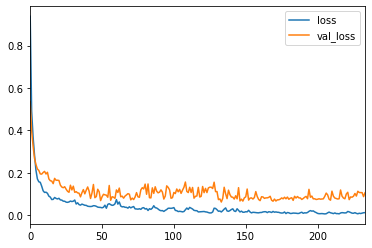

In [63]:
ann_regression_df = pd.DataFrame(ann_regression.history.history)
ann_regression_df[["loss","val_loss"]].plot()

In [64]:
ann_regression.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 11)                154       
                                                                 
 dense_11 (Dense)            (None, 7)                 84        
                                                                 
 dense_12 (Dense)            (None, 14)                112       
                                                                 
 dense_13 (Dense)            (None, 6)                 90        
                                                                 
 dense_14 (Dense)            (None, 6)                 42        
                                                                 
 dense_15 (Dense)            (None, 13)                91        
                                                                 
 dense_16 (Dense)            (None, 11)               

In [65]:
ann_regression.evaluate(x_train,y_train)

7/7 [==============================] - 0s 997us/step - loss: 0.0283


0.028266707435250282

In [66]:
ann_regression_df.to_csv(export_data_path+"LOSS_VALUES.csv")

In [67]:
ann_file = 'ann_model.h5'
ann_regression.save(model_path+ann_file)


.......................................THE END..........................................................